### Part 2 - simulation experiments

The correctness of the implementation is checked below in the following way:
* generate two synthetic datasets (done ALE są losowe, a nie sensowne)
* check if there is a possibility to get probabilities and predictions for all observations (DONE)
* check metrics (Accuracy, Precision, Recall, F1-score) at the end of training for two synthetic datasets (done ALE dane są losowe, a nie sensowne)
* check Accuracy and estimated Beta behaviour during the training (TO DO) ???yyy coś nie działa
* check the differences on the plot (between the beginning and the end of the training) (TO DO) ??? jaka jest kolejność tych współczynników i czy to aby na pewn są te co być miały?
* check the performance on XOR data DONE


TO DO oprócz tego:
- dane różne wg tego co na spotkaniu ustalałyśmy

In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit
from scipy.stats import bernoulli
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from LogisticRegression_with_IRLS import LogisticRegression_with_IRLS
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(11,9)})
import matplotlib.pyplot as plt

#### Synthetic dataset 1

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
np.random.seed(123)
first_dataset_X = np.random.normal(size=(100, 3))
first_dataset_y = np.random.binomial(1, sigmoid(np.dot(np.column_stack((np.ones(100), first_dataset_X)), np.array([1, 2, 3,4]))))

#### Synthetic dataset 2

In [4]:
n = 50
b = np.array([2.3, 4.5, 0.345])
second_dataset_X = np.zeros((n,3))
for i in range(n):
    second_dataset_X[i][0]=np.random.normal(0,1,1)
    second_dataset_X[i][1]=np.random.normal(3,2,1)
    second_dataset_X[i][2]=np.random.normal(-5,3,1)
p=(1/(1+np.exp(-(np.dot(second_dataset_X, b.T)))))
second_dataset_y= bernoulli.rvs(p, size=n)

#### Test 1

Check if there is a possibility to get probabilities and predictions for all observations.

In [5]:
#first dataset without interactions
first_dataset_X_train, first_dataset_X_test, first_dataset_y_train, first_dataset_y_test = train_test_split(first_dataset_X, first_dataset_y, test_size=0.2, random_state=42)
first_clf = LogisticRegression_with_IRLS()
first_clf.fit(first_dataset_X_train, first_dataset_y_train, max_iter=500)
first_dataset_proba = first_clf.predict_proba(first_dataset_X_test)
first_dataset_y_pred = first_clf.predict(first_dataset_X_test)

In [6]:
print(f'Length of test dataset: {len(first_dataset_X_test)}, length of predicted probabilities: {len(first_dataset_proba)}, length of predicted classes: {len(first_dataset_y_pred)}.')
print(f'First 10 predicted probabilities: {first_dataset_proba[:10]}.')
print(f'First 10 predicted classes: {first_dataset_y_pred[:10]}.')

Length of test dataset: 20, length of predicted probabilities: 20, length of predicted classes: 20.
First 10 predicted probabilities: [0.65050109 0.49609472 0.51727635 0.53093893 0.56757831 0.55654379
 0.43393008 0.52394497 0.26094308 0.59945066].
First 10 predicted classes: [1 0 1 1 1 1 0 1 0 1].


In [7]:
second_dataset_X_train, second_dataset_X_test, second_dataset_y_train, second_dataset_y_test = train_test_split(second_dataset_X, second_dataset_y, test_size=0.2, random_state=42)
second_clf = LogisticRegression_with_IRLS()
second_clf.fit(second_dataset_X_train, second_dataset_y_train, interaction_ids = [[0,1],[0,2],[1,2]], max_iter=500)
second_dataset_proba = second_clf.predict_proba(second_dataset_X_test)
second_dataset_y_pred = second_clf.predict(second_dataset_X_test)

In [8]:
print(f'Length of test dataset: {len(second_dataset_X_test)}, length of predicted probabilities: {len(second_dataset_proba)}, length of predicted classes: {len(second_dataset_y_pred)}.')
print(f'First 10 predicted probabilities: {second_dataset_proba[:10]}.')
print(f'First 10 predicted classes: {second_dataset_y_pred[:10]}.')

Length of test dataset: 10, length of predicted probabilities: 10, length of predicted classes: 10.
First 10 predicted probabilities: [0.77194373 0.73495577 0.73974003 0.71972232 0.77286097 0.62428758
 0.66018022 0.67107202 0.75824761 0.72779221].
First 10 predicted classes: [1 1 1 1 1 1 1 1 1 1].


Yes, it is possible to get probabilities and predicted classed for both IRLS and IRLS with iteractions.

#### Test 2
Check metrics (Accuracy, Precision, Recall, F1-score) at the end of training for two synthetic datasets.

In [9]:
def run_experiments(X, y, iterations=10):
    acc_all=np.zeros((iterations, 2))
    prec_all=np.zeros((iterations, 2))
    rec_all=np.zeros((iterations, 2))
    f1_all=np.zeros((iterations, 2))
    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        clf_without_interactions = LogisticRegression_with_IRLS()
        clf_without_interactions.fit(X_train, y_train, max_iter=500)
        y_pred_without_interactions = clf_without_interactions.predict(X_test)
        acc_all[i][0]=accuracy_score(y_test, y_pred_without_interactions)
        prec_all[i][0]=precision_score(y_test, y_pred_without_interactions)
        rec_all[i][0]=recall_score(y_test, y_pred_without_interactions)
        f1_all[i][0]=f1_score(y_test, y_pred_without_interactions)
        clf_with_interactions = LogisticRegression_with_IRLS()
        clf_with_interactions.fit(X_train, y_train, interaction_ids = [[0,1],[0,2],[1,2]], max_iter=500)
        y_pred_with_interactions = clf_with_interactions.predict(X_test)
        acc_all[i][1]=accuracy_score(y_test, y_pred_with_interactions)
        prec_all[i][1]=precision_score(y_test, y_pred_with_interactions)
        rec_all[i][1]=recall_score(y_test, y_pred_with_interactions)
        f1_all[i][1]=f1_score(y_test, y_pred_with_interactions)
    return acc_all, prec_all, rec_all, f1_all

In [10]:
def make_boxplot(acc, prec, rec, f1, name, dataset_name):
    #four plots for four metrics
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{name} for models for {dataset_name}', fontsize=20)
    axs[0, 0].boxplot(acc)
    axs[0, 0].set_title('Accuracy', fontsize=15)
    axs[0, 0].set_xticklabels(['Without interactions', 'With interactions'], fontsize=12)
    axs[0, 1].boxplot(prec)
    axs[0, 1].set_title('Precision', fontsize=15)
    axs[0, 1].set_xticklabels(['Without interactions', 'With interactions'], fontsize=12)
    axs[1, 0].boxplot(rec)
    axs[1, 0].set_title('Recall', fontsize=15)
    axs[1, 0].set_xticklabels(['Without interactions', 'With interactions'], fontsize=12)
    axs[1, 1].boxplot(f1)
    axs[1, 1].set_title('F1-score', fontsize=15)
    axs[1, 1].set_xticklabels(['Without interactions', 'With interactions'], fontsize=12)

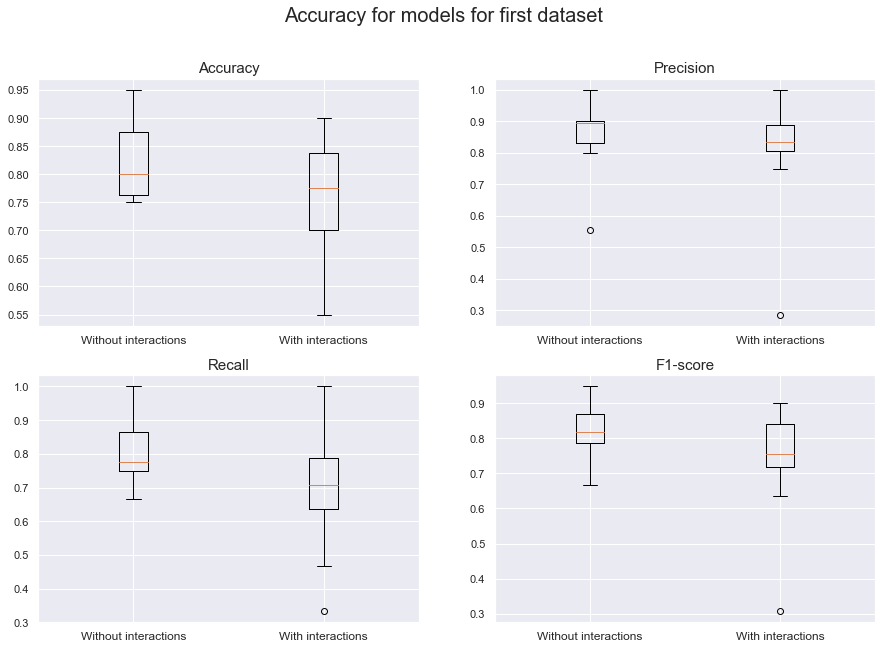

In [11]:
first_acc_all, first_prec_all, first_rec_all, first_f1_all = run_experiments(first_dataset_X, first_dataset_y)
make_boxplot(first_acc_all, first_prec_all, first_rec_all, first_f1_all, 'Accuracy', 'first dataset')

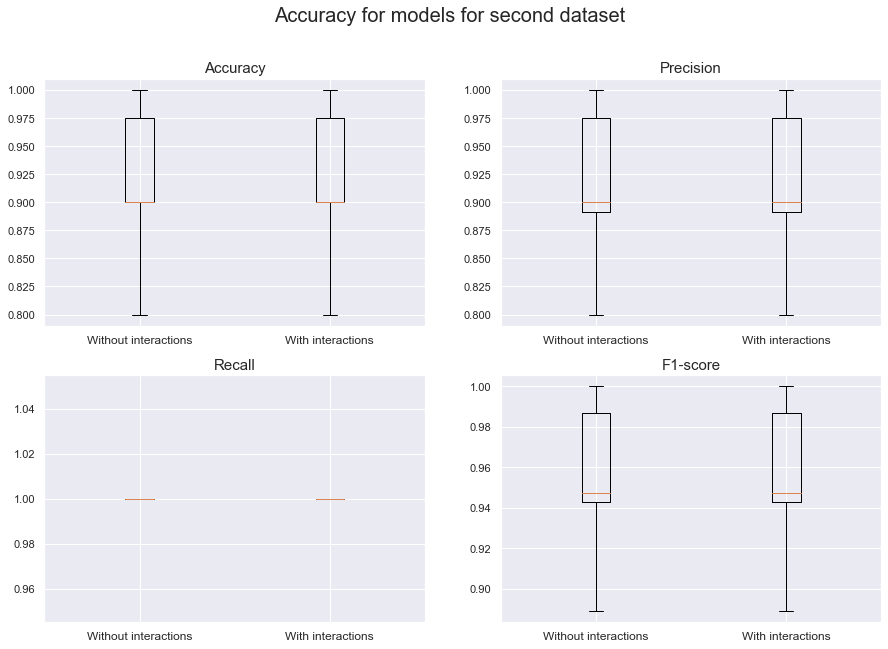

In [12]:
second_acc_all, second_prec_all, second_rec_all, second_f1_all = run_experiments(second_dataset_X, second_dataset_y)
make_boxplot(second_acc_all, second_prec_all, second_rec_all, second_f1_all, 'Accuracy', 'second dataset')

#### Test 3
Check Accuracy and estimated Beta behaviour during the training (TO DO).

In [18]:
clf = LogisticRegression_with_IRLS(test_flag=True, X_test= first_dataset_X_test, y_test=first_dataset_y_test)
clf.fit(first_dataset_X_train, first_dataset_y_train, max_iter=10)

In [19]:
test4_y_pred=clf.predict(first_dataset_X_test)
accuracy_score(first_dataset_y_test, test4_y_pred)

0.8

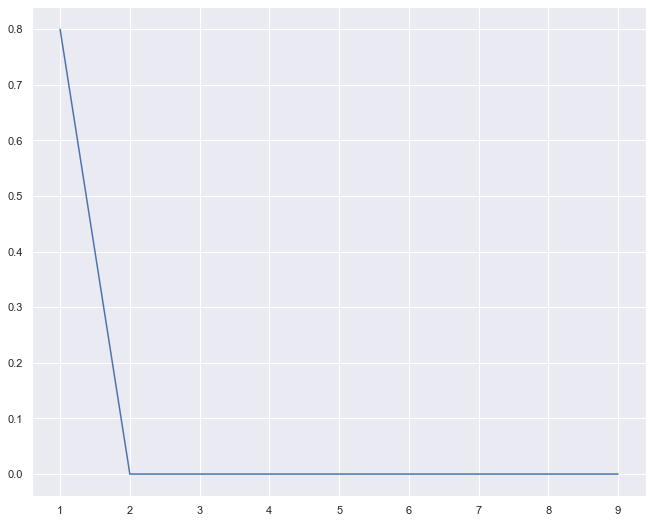

In [20]:
test4_acc=clf.acc_all
test4_tol = clf.tol_all
n=range(1, len(test4_acc)+1)
plt.plot(n, test4_acc, label='Accuracy')

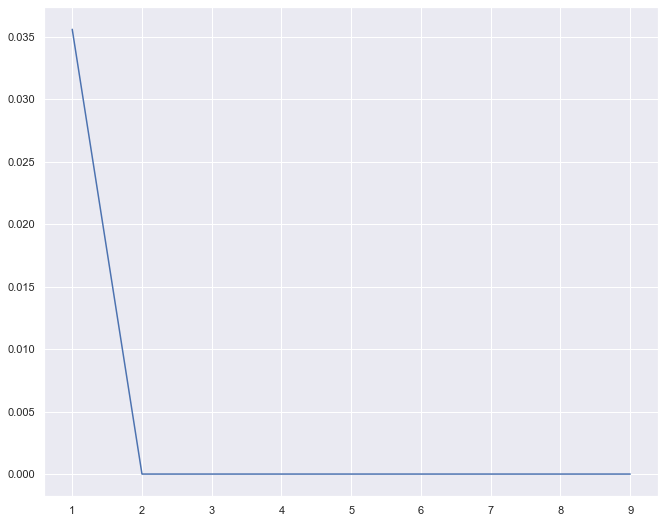

In [21]:
plt.plot(n, test4_tol, label='Tolerance')

#### Test 4

Check the differences on the plot (between the beginning and the end of the training) (TO DO).

In [62]:
clf = LogisticRegression_with_IRLS()
clf.fit(first_dataset_X_train, first_dataset_y_train, max_iter=1)
coef_one_without_interactions = clf.get_params()
y_pred_one_without_interactions = clf.predict(first_dataset_X_test)
clf = LogisticRegression_with_IRLS()
clf.fit(first_dataset_X_train, first_dataset_y_train, max_iter=100)
coef_all_without_interactions = clf.get_params()
y_pred_all_without_interactions = clf.predict(first_dataset_X_test)

In [63]:
print(f'Without interactions, first iteration: {coef_one_without_interactions}, all iterations: {coef_all_without_interactions}.')

Without interactions, first iteration: [0.01384997 0.24380078 0.24578121], all iterations: [-0.07636319  0.27413554  0.16561915].


In [69]:
def draw_boundary(X, y, coef):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    x1 = np.linspace(-2, 2, 100)
    m=-(coef[0])/coef[1]
    c= - (coef[2])/coef[1]
    y = m*x1 + c
    ax.plot(x1, y)
    plt.show()

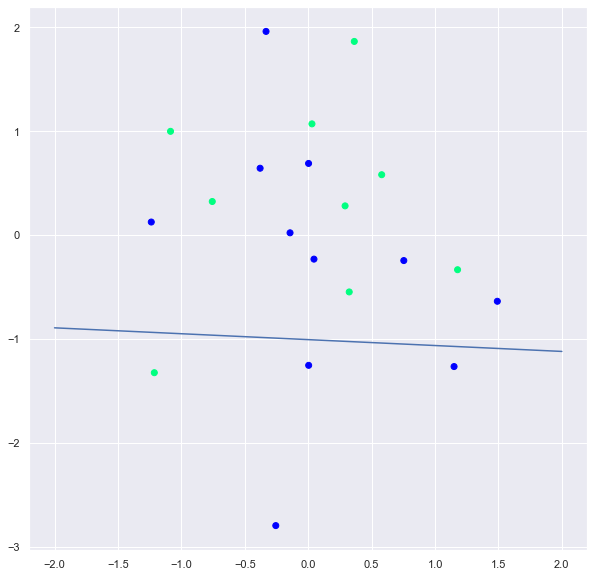

In [70]:
draw_boundary(first_dataset_X_test, y_pred_one_without_interactions, coef_one_without_interactions)

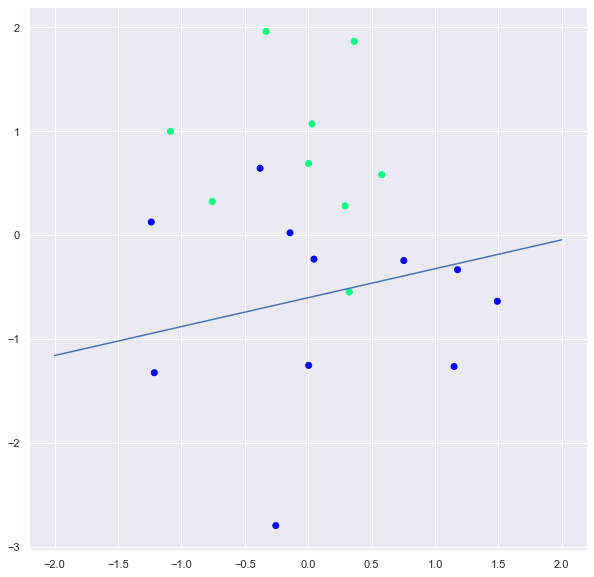

In [71]:
draw_boundary(first_dataset_X_test, y_pred_all_without_interactions, coef_all_without_interactions)

In [67]:
accuracy_score(first_dataset_y_test, y_pred_one_without_interactions)

0.85

In [68]:
accuracy_score(first_dataset_y_test, y_pred_all_without_interactions)

0.75

#### Test 5

Check the performance on XOR data #ma to sens w ogóle???? (TO DO).

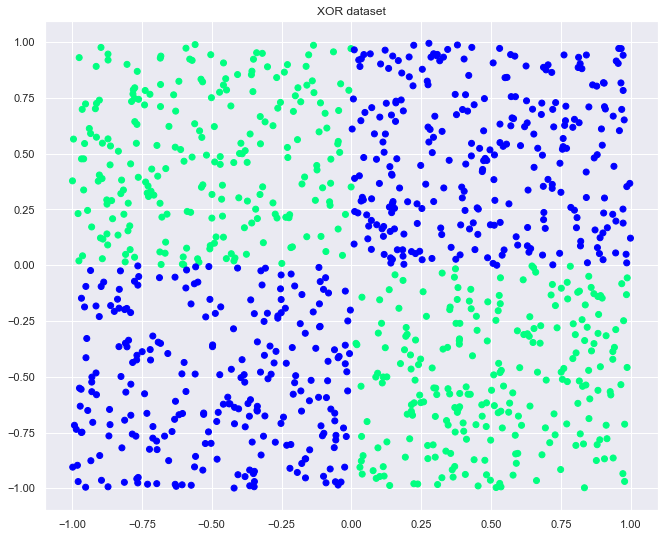

In [23]:
#generate XOR dataset
xor_X = np.random.uniform(-1, 1, (1000, 2))
xor_y = np.logical_xor(xor_X[:, 0] > 0, xor_X[:, 1] > 0).astype(int)

In [43]:
#test IRLS without iteractions on XOR dataset
xor_X_train, xor_X_test, xor_y_train, xor_y_test = train_test_split(xor_X, xor_y, test_size=0.2, random_state=42)
xor_clf = LogisticRegression_with_IRLS()
xor_clf.fit(xor_X_train, xor_y_train, max_iter=500)
xor_y_pred = xor_clf.predict(xor_X_test)
print(f'Accuracy: {accuracy_score(xor_y_test, xor_y_pred)}')

Accuracy: 0.485


Text(0.5, 0.98, 'IRLS without interactions')

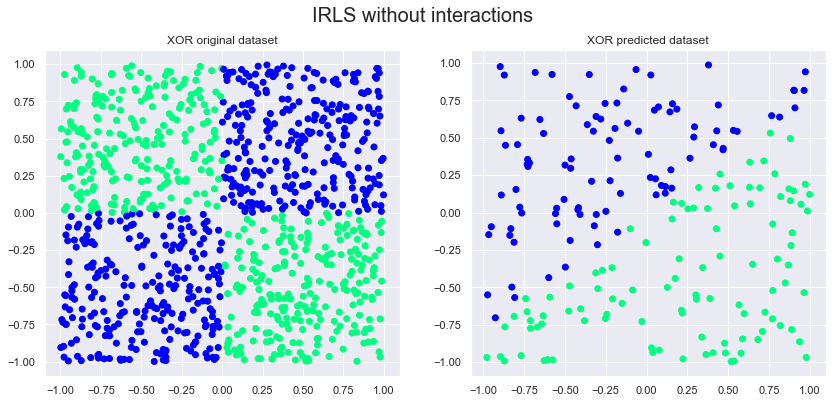

In [44]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
ax[0].scatter(xor_X[:, 0], xor_X[:, 1], c=xor_y, cmap='winter')
ax[0].title.set_text('XOR original dataset')
ax[1].scatter(xor_X_test[:, 0], xor_X_test[:, 1], c=xor_y_pred, cmap='winter')
ax[1].title.set_text('XOR predicted dataset')
fig.suptitle('IRLS without interactions', fontsize=20)

In [48]:
#test IRLS with iteractions on XOR dataset
xor_clf_with = LogisticRegression_with_IRLS()
xor_clf_with.fit(xor_X_train, xor_y_train, max_iter=500, interaction_ids=[[0, 1]])
xor_y_pred_with = xor_clf_with.predict(xor_X_test)
print(f'Accuracy: {accuracy_score(xor_y_test, xor_y_pred_with)}')

Accuracy: 0.945


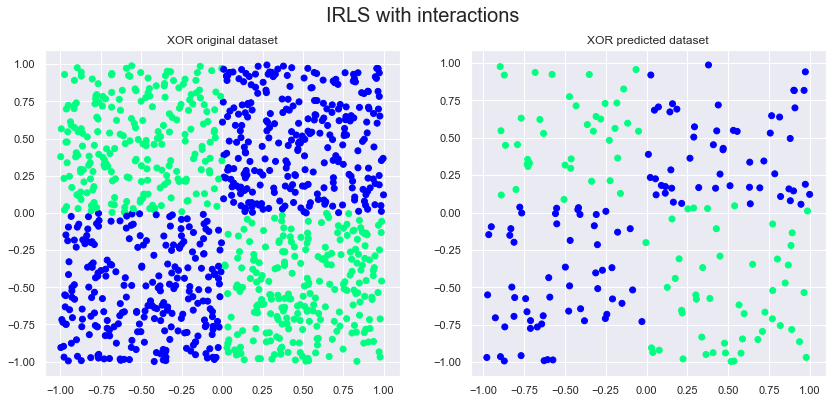

In [50]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
ax[0].scatter(xor_X[:, 0], xor_X[:, 1], c=xor_y, cmap='winter')
ax[0].title.set_text('XOR original dataset')
ax[1].scatter(xor_X_test[:, 0], xor_X_test[:, 1], c=xor_y_pred_with, cmap='winter')
ax[1].title.set_text('XOR predicted dataset')
fig.suptitle('IRLS with interactions', fontsize=20)
plt.show()

For the XOR problem, IRLS without interactions was able to achieve only about 0.49 of accuracy, what is not satisfying. However, IRLS with interactions (between x and y coordinate) achieved nearly 0.95 accuracy.